# what is CNN

CNN are special neural network for images
they learn to detect patterns like
- edges
- shapes
- textures
- objects 

instead of feeding raw image pixels to a normal ANN, CNN uses filters (kernels) that slide over the image and extract features just like your eyes scanning an object 

Input image
↓
convolution→ →

## dataset : mnist(28*28 images of digits 0-9)

- each image is 28*28 pixel
- gray scale
- labelled with the correct digit (0-9)

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Load dataset
(X_train,y_train), (X_test,y_test)= mnist.load_data()
# Reshape for CNN : (samples, height, width, channels)
X_train= X_train.reshape(-1,28,28,1).astype("float32")/255
X_test= X_test.reshape(-1,28,28,1).astype("float32")/255
# One-hot encode labels
y_train =to_categorical(y_train)
y_test= to_categorical(y_test)
print("Test shape:",X_train.shape)
print("test shape:",X_test.shape)

Test shape: (60000, 28, 28, 1)
test shape: (10000, 28, 28, 1)


### Build CNN Model

In [3]:
model= Sequential()
# Conv Layer 1
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Layer 2
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten before Dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128,activation='relu'))

#Output layer (10 digits)
model.add(Dense(10,activation='softmax'))

C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### compile model

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Train the Model

In [9]:
history=model.fit(X_train,y_train, epochs=5,batch_size=128,validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.9342 - loss: 0.2232 - val_accuracy: 0.9807 - val_loss: 0.0655
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9815 - loss: 0.0581 - val_accuracy: 0.9855 - val_loss: 0.0512
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9868 - loss: 0.0419 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9878 - val_loss: 0.0447
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.9929 - loss: 0.0234 - val_accuracy: 0.9895 - val_loss: 0.0399


### Evaluate Performance

In [10]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(f"Test Accuracy : {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9891 - loss: 0.0314
Test Accuracy : 0.99


### Visualize Training History

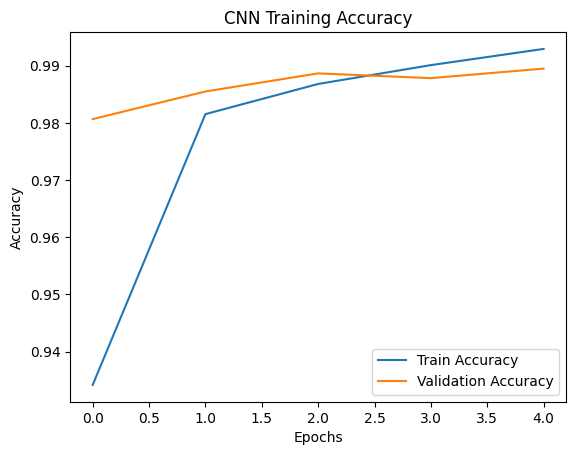

In [11]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training Accuracy")
plt.legend()
plt.show()